In [2]:

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow

In [2]:
def charger_images(chemin_dossier):
    images = []
    for nom_fichier in os.listdir(chemin_dossier):
        chemin_image = os.path.join(chemin_dossier, nom_fichier)
        image = cv2.imread(chemin_image)
        if image is not None:
            images.append(image)
    return images

In [3]:
def redimensionner_images(images, nouvelle_taille):
    images2 = []
    for image in images:
        image_redimensionnee = cv2.resize(image, nouvelle_taille)
        images2.append(image_redimensionnee)
    return images2

In [4]:
def normaliser_images(images):
    images2 = []
    for image in images:
        image_normalisee = image / 255.0  # Normalisation entre 0 et 1
        images2.append(image_normalisee)
    return images2

In [5]:
# Chargement 
chemin_dossier = "./dataset/chway/"
images = charger_images(chemin_dossier)

# Redimensionnement
taille = (224, 224)
images_dim = redimensionner_images(images, taille)
images_norm = normaliser_images(images_dim)


In [6]:
print(images)
print(chemin_dossier)

[array([[[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       ...,

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
 

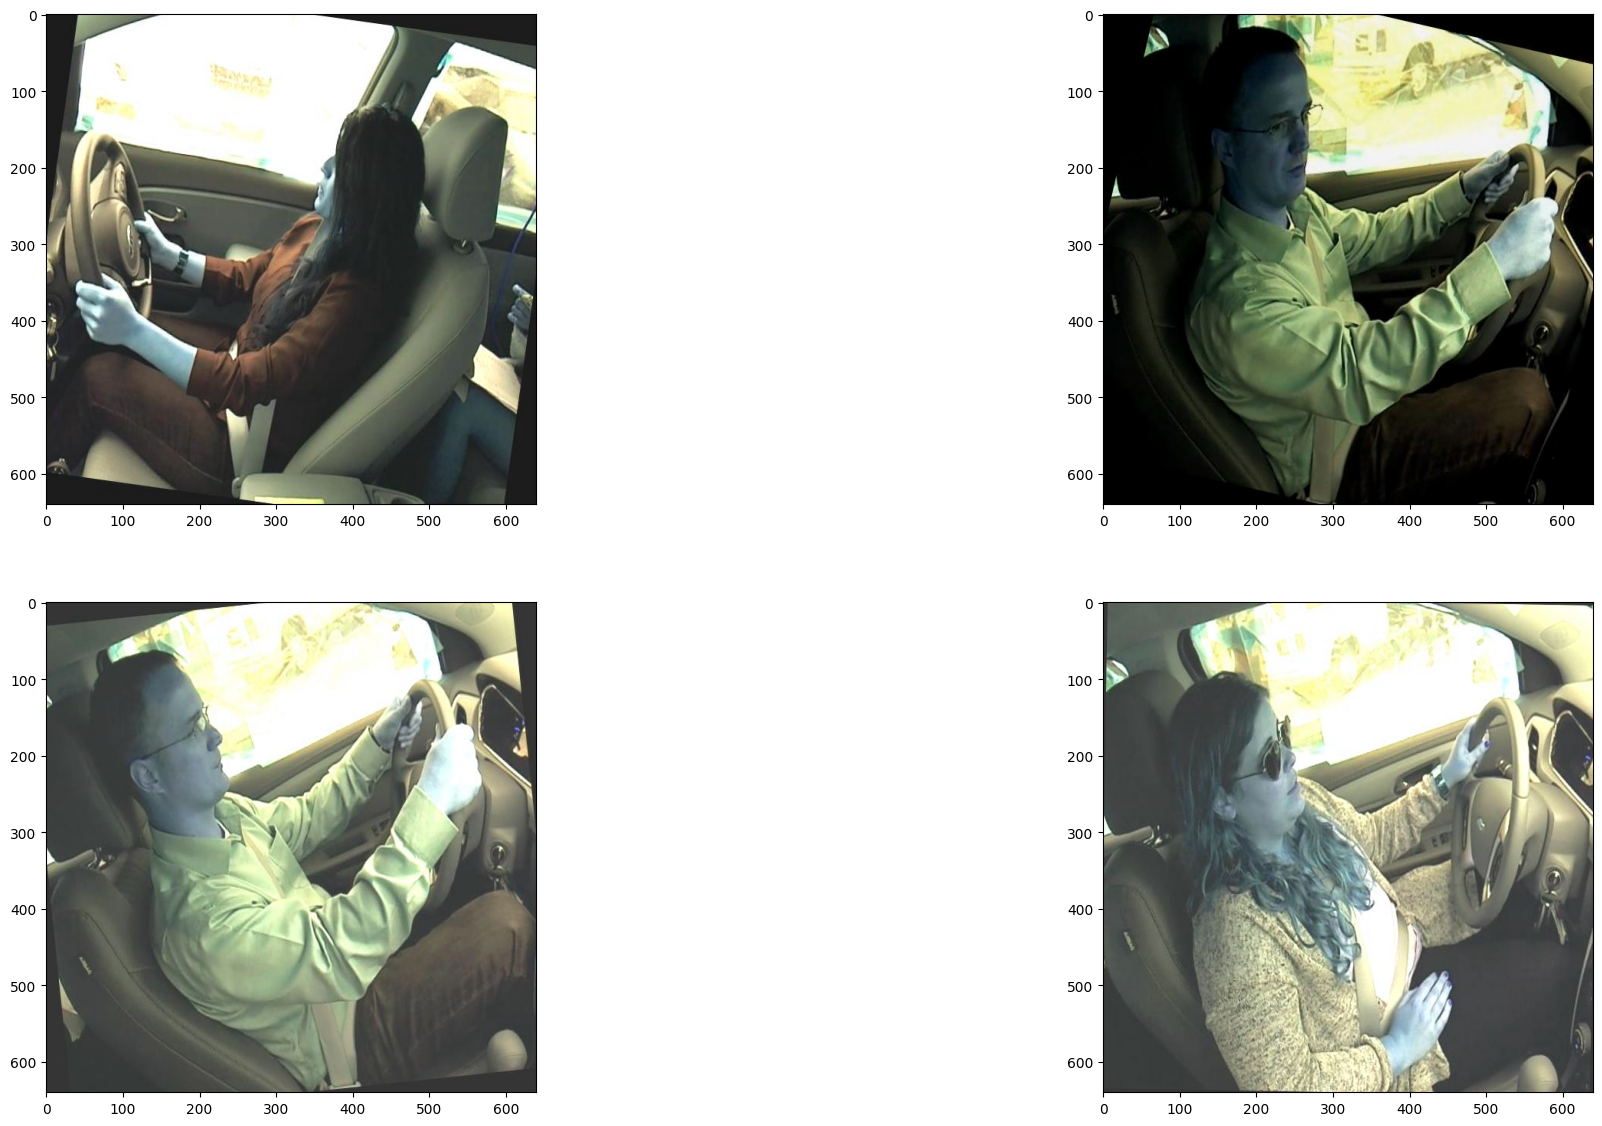

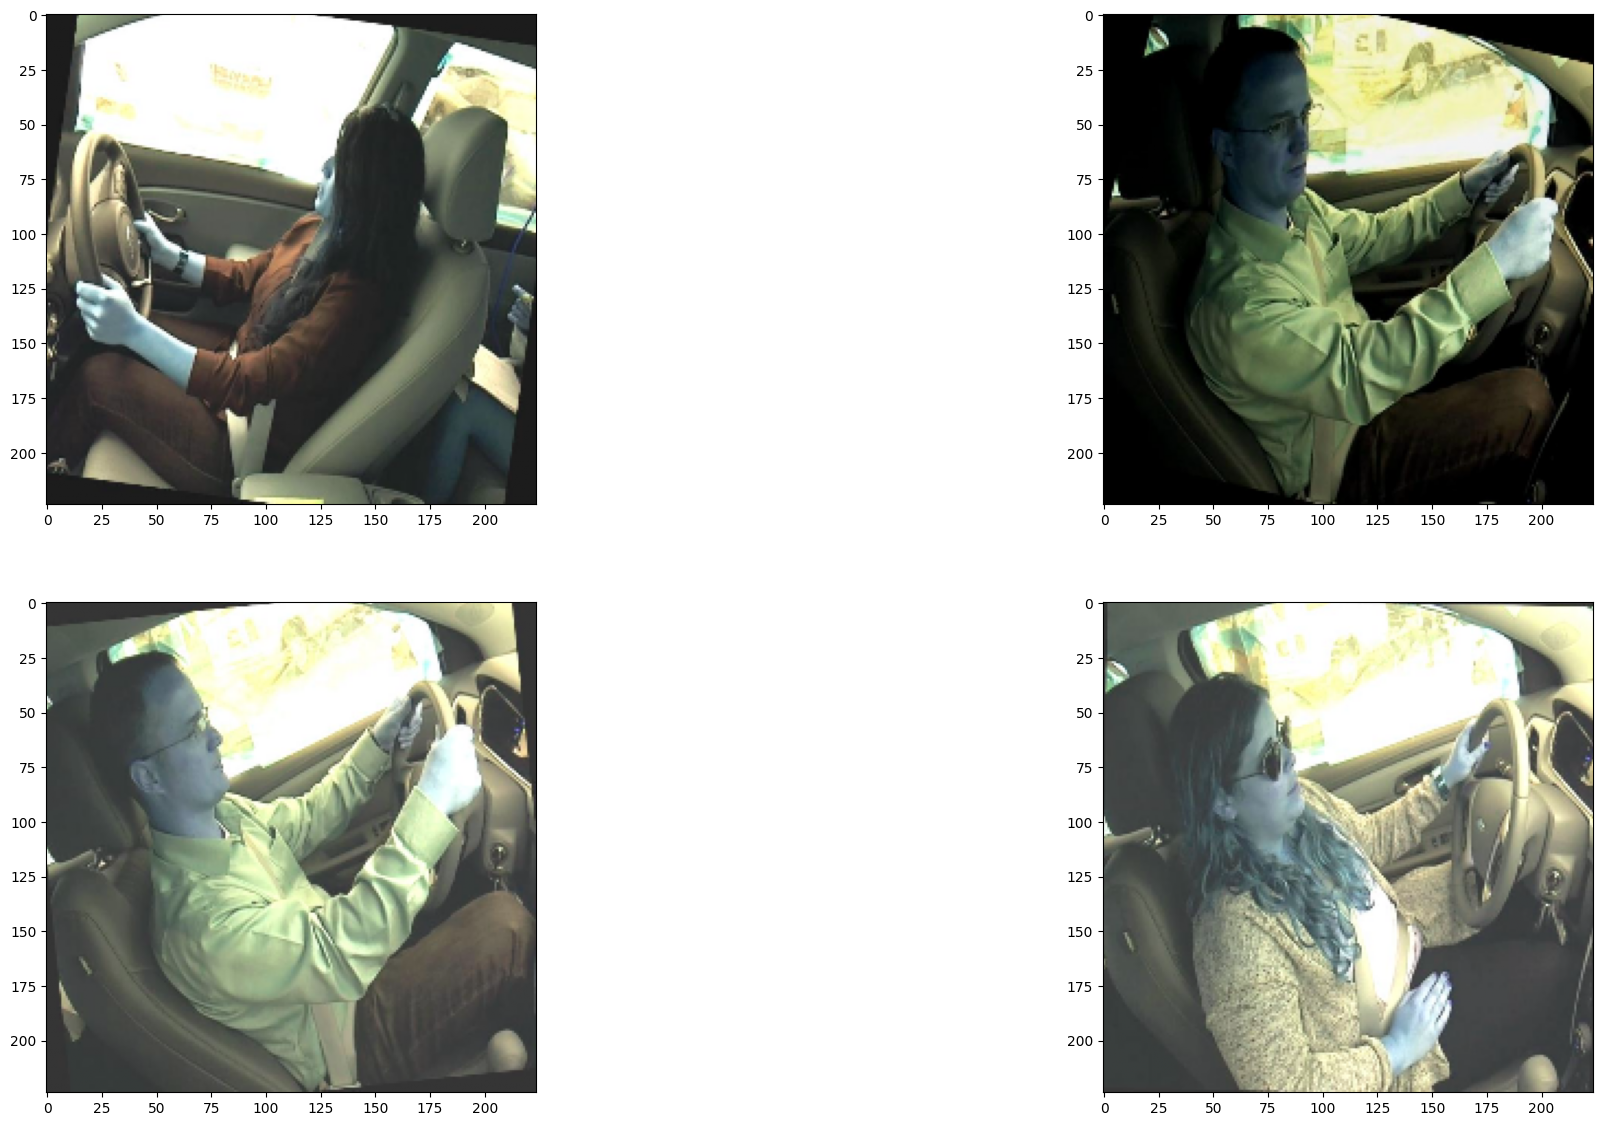

In [7]:
_, axs = plt.subplots(2,2, figsize=(25, 14))

axs = axs.flatten()

for cent, ax in zip(images, axs):
    ax.imshow(cent)
plt.show()

_, axs = plt.subplots(2,2, figsize=(25, 14))

axs = axs.flatten()

for cent, ax in zip(images_norm, axs):
    ax.imshow(cent)
plt.show()

In [8]:
for i in range(5):
    print(images[i].shape)
    print(images_norm[i].shape)
    plt.show()

(640, 640, 3)
(224, 224, 3)
(640, 640, 3)
(224, 224, 3)
(640, 640, 3)
(224, 224, 3)
(640, 640, 3)
(224, 224, 3)
(640, 640, 3)
(224, 224, 3)


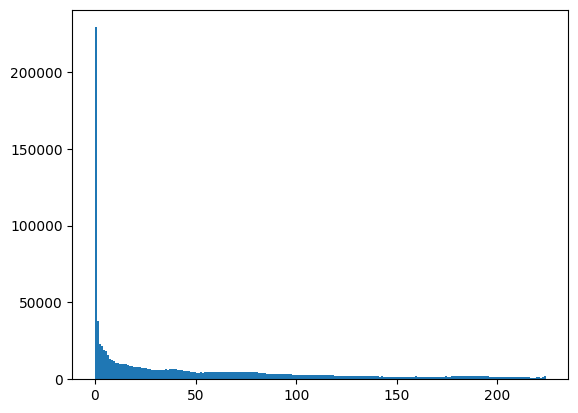

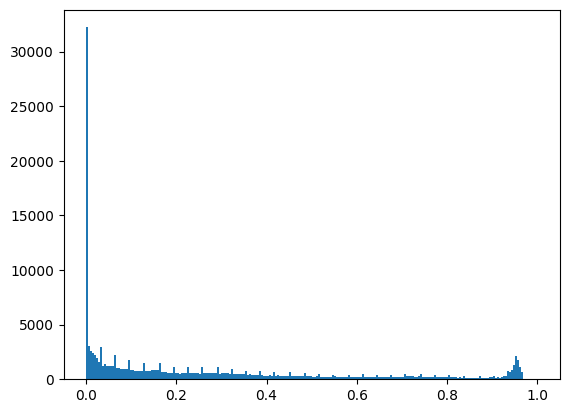

In [9]:

plt.hist(images[1].ravel(), bins=224, range=[0, 224])
plt.show()
plt.hist(images_norm[1].ravel(), bins=224, range=[0, 1])
plt.show()

In [10]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

import yolov4

In [13]:
# Load YOLOv4-tiny model
yolo = yolov4("yolov4/yolov4.cfg")
yolo.classes = ["Safe driving", "Texting - right", "Talking on the phone - right", "Texting - left",
                "Talking on the phone - left", "Operating the radio", "Drinking", "Reaching behind",
        
                "Hair and makeup", "Talking to a passenger"]
yolo.make_model()
yolo.load_weights("yolov4/yolov4-tiny.weights", weights_type="yolo")


TypeError: 'module' object is not callable

In [14]:
from yolov4.tf import YOLOv4, YOLODataset, save_as_tflite

# Define the training configuration
yolo = YOLOv4()
yolo.config.parse_names("yolov4/coco.names")
yolo.config.parse_cfg("yolov4/yolov4.cfg")


yolo.make_model()
yolo.load_weights("yolov4/yolov4.weights", weights_type="yolo")


In [15]:
image_path = "dataset/chway/img_29877_jpg.rf.c578b92805e492a02f36337a44dea64e.jpg"  # Replace with the path to your sample image
#image = yolo.preprocess_image_batch(image_path)
image = images[1]
# Perform inference
#boxes, scores, classes, nums = yolo.predict(image)
prob_thresh = 0.5
boxes, scores, classes, nums = yolo.predict(image, prob_thresh=prob_thresh)
# Display the image with detected objects
yolo.draw_boxes(image, boxes, scores, classes, nums, yolo.classes)

UnimplementedError: Graph execution error:

Detected at node yolov4/convolutional_0/activation/mish/mul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 518, in process_one

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 766, in execute_request

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\Koussay\AppData\Local\Temp\ipykernel_11536\85088636.py", line 7, in <module>

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\__init__.py", line 122, in predict

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\__init__.py", line 103, in _predict

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 47, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 49, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 64, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 73, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 74, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\layers\core\activation.py", line 59, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\layers\core\activation.py", line 59, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\layers\convolutional_layer.py", line 119, in mish

Fusion is not implemented: [FusedBatchNorm,Mish]
	 [[{{node yolov4/convolutional_0/activation/mish/mul}}]] [Op:__inference__predict_12059]

In [22]:
from yolov4.tf import YOLOv4

# Load YOLOv4-tiny model

yolo = YOLOv4()
yolo.config.parse_names("yolov4/coco.names")
yolo.config.parse_cfg("yolov4/yolov4.cfg")

yolo.make_model()
yolo.load_weights("yolov4/yolov4.weights", weights_type="yolo")

# Replace Mish activation with Leaky ReLU
for i in range(len(yolo.model.layers)):
    if hasattr(yolo.model.layers[i], "activation") and yolo.model.layers[i].activation == "mish":
        yolo.model.layers[i].activation = "linear"  # Replace "mish" with "linear" (no activation)
        if i < len(yolo.model.layers) - 1:
            yolo.model.layers[i+1].activation = "leaky"  # Next layer uses Leaky ReLU


image_path = "dataset/chway/img_29877_jpg.rf.c578b92805e492a02f36337a44dea64e.jpg"  # Replace with the path to your sample image
#image = yolo.preprocess_image_batch(image_path)
image = images[1]
# Perform inference
#boxes, scores, classes, nums = yolo.predict(image)
prob_thresh = 0.5
boxes, scores, classes, nums = yolo.predict(image, prob_thresh=prob_thresh)
# Display the image with detected objects
yolo.draw_boxes(image, boxes, scores, classes, nums, yolo.classes)

UnimplementedError: Graph execution error:

Detected at node yolov4/convolutional_0/activation/mish/mul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 518, in process_one

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\kernelbase.py", line 766, in execute_request

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\Koussay\AppData\Local\Temp\ipykernel_11536\3662218251.py", line 26, in <module>

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\__init__.py", line 122, in predict

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\__init__.py", line 103, in _predict

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 47, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 49, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 64, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 73, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\model.py", line 74, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\layers\core\activation.py", line 59, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\keras\src\layers\core\activation.py", line 59, in call

  File "c:\Users\Koussay\Desktop\Tma7rith\Code\Data science\projet\myenv\Lib\site-packages\yolov4\tf\layers\convolutional_layer.py", line 119, in mish

Fusion is not implemented: [FusedBatchNorm,Mish]
	 [[{{node yolov4/convolutional_0/activation/mish/mul}}]] [Op:__inference__predict_43614]